# Tree-based regression

Tree-based regression makes predictions on a target variable $y$ by developing rules that divide our $X$ data set (called our feature space) into regions.
Given a vector of covariates $x^{*}_{i}$,  a TBR model looks at the training observations, picks those observations that are simialr, and averages the corresponding $y$ values.
A TBR model does this by partitioning the training observations through a series of rules. 
TBR models are non-linear.

As an example, a TBR model could specify the following rules: (i) if $x_{1} < 4.5$ and $x_{2} < 2.0$ then $y$ falls in region 1, (ii) if $x_{1} < 4.5$ and $x_{2} $$\geq$$ 2.0$ then $y$ falls in region 2,if $x_{1} $$\geq$$ 4.5$ and $x_{2} < 2.0$ then $y$ falls in region 3, and if $x_{1} $$\geq$$ 4.5$ and $x_{2} $$\geq$$ 2.0$ then $y$ falls in region 4. 

And the above rule can be represented as a tree.

![title](./treeExample.jpeg)

You start at the top (root) of the tree with your x covariates.
Work your way down the tree, and every time you come to a split, take the path that corresponds to your x data.
For example, if my x data was $x=[2,5]$ I would move to the left at the first split because $x_{1}=2<4.5$.
I would continue down the left side of the tree until the next split.
At the next split I would move right because $x_{2}=5>2.0$ and the prediction my tree would make is the average of all $y$ values in region 2. 

There is a simple idea behind trees and rule-based regression methods.
Observations that have similar characteristics can be predicted with a simpler model that explains $P(Y|X)$.
Rather than try to model $P(Y|X)$ directly, which could have complicated nonlinearities, model a small portion of $P(Y|X^{*})$ that has a simpler structure. By taking a simple average of $y$ values we are assuming that, in any given small region of feature space, the $y$ values can be predicted to be a simple average. 

Rather than a tree or textual rules, we can graphically understand how the tree above splits our data.
First, we can load the ISLR package that includes the Hitters dataset.

In [98]:
require(ISLR)
print(head(Hitters))

                  AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun
-Alan Ashby         315   81     7   24  38    39    14   3449   835     69
-Alvin Davis        479  130    18   66  72    76     3   1624   457     63
-Andre Dawson       496  141    20   65  78    37    11   5628  1575    225
-Andres Galarraga   321   87    10   39  42    30     2    396   101     12
-Alfredo Griffin    594  169     4   74  51    35    11   4408  1133     19
-Al Newman          185   37     1   23   8    21     2    214    42      1
                  CRuns CRBI CWalks League Division PutOuts Assists Errors
-Alan Ashby         321  414    375      N        W     632      43     10
-Alvin Davis        224  266    263      A        W     880      82     14
-Andre Dawson       828  838    354      N        E     200      11      3
-Andres Galarraga    48   46     33      N        E     805      40      4
-Alfredo Griffin    501  336    194      A        W     282     421     25
-Al Newman        

For this example, I'm using the number of years the baseball is active and the number of hits they have as my $X$ data. I will try and predict baseball player's salary, my target ($y$) variable.

In [99]:
x1 = Hitters$Years
x2 = Hitters$Hits
y =  Hitters$Salary

First I will plot my $x1$ and $x2$ data.

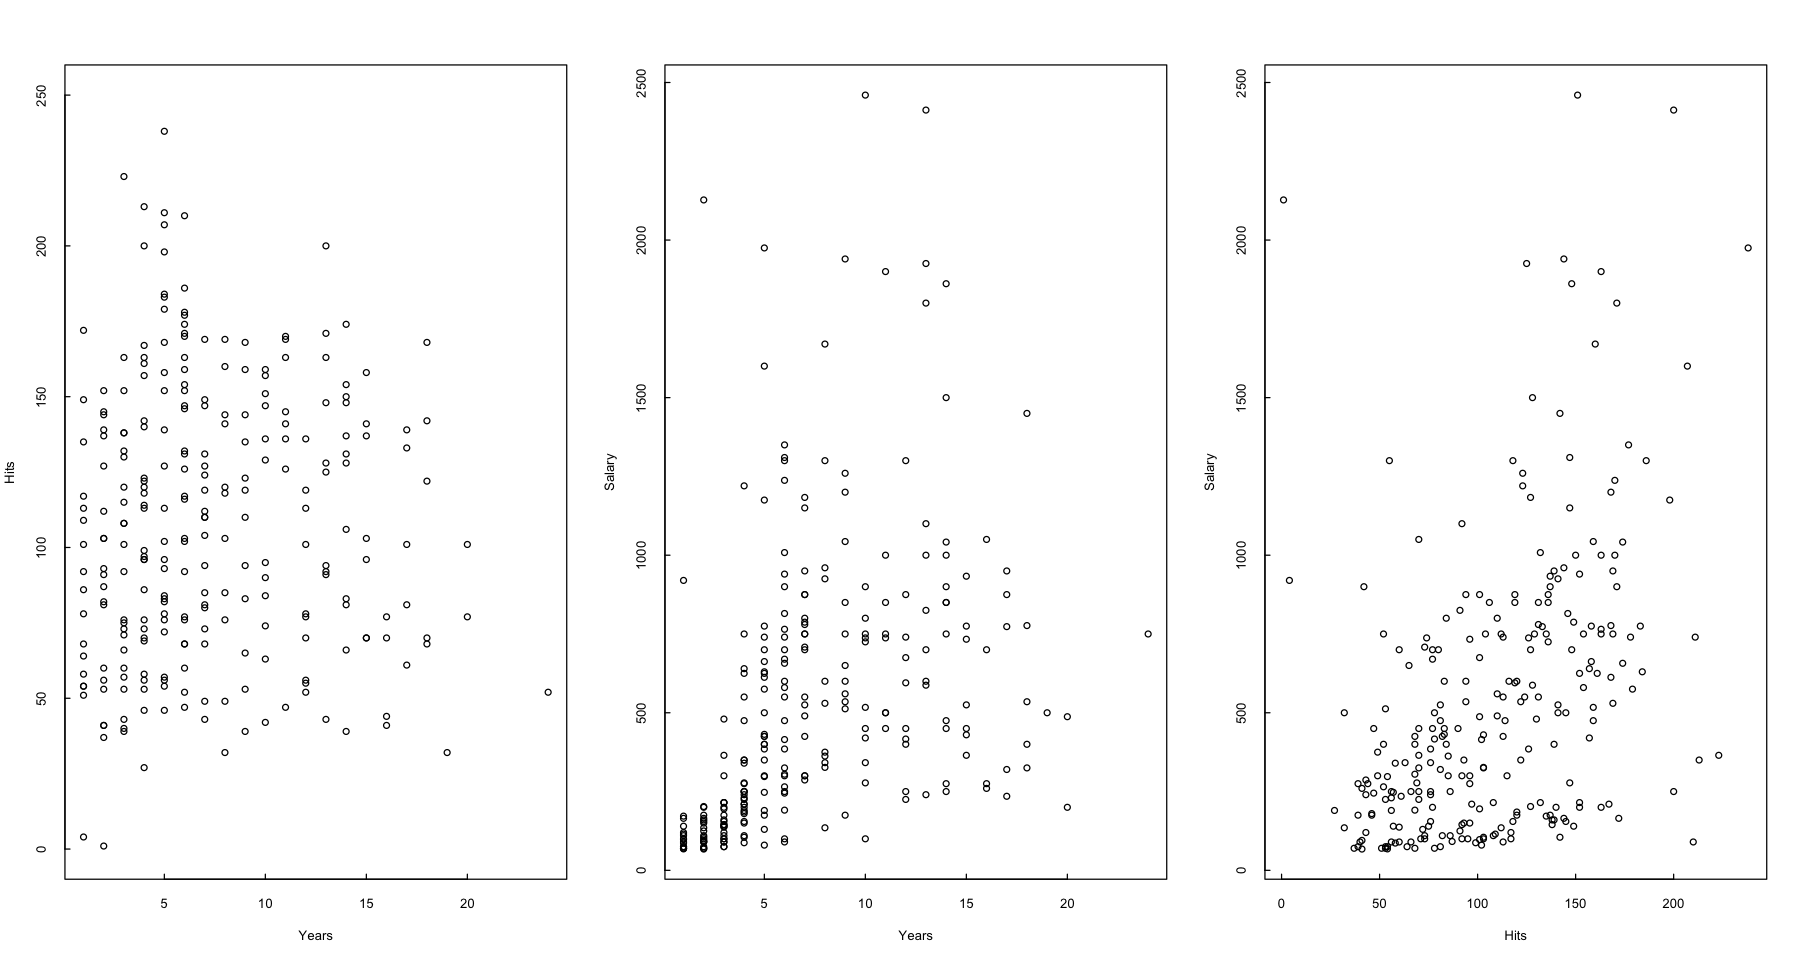

In [100]:
options(repr.plot.width=15,repr.plot.height=8)
par(mfrow=c(1,3))
plot(x1,x2, ylim=c(0,250),ylab='Hits'  ,xlab='Years',tck=0.01)
plot(x1,y ,ylab='Salary',xlab='Years',tck=0.01)
plot(x2,y ,ylab='Salary',xlab='Hits',tck=0.01)

The relationship between salary, and hits and years appears non-linear.
A linear model could be difficult to fit, and accurately predict salary.
Assume instead we created a tree (like the above example) with two rules.
The first rule partitions the data into Years less than or greater than or equal 4.5.
The second rule then partitions the data by the average number of hits a player has as greater than or equal, or less than 117.5. 

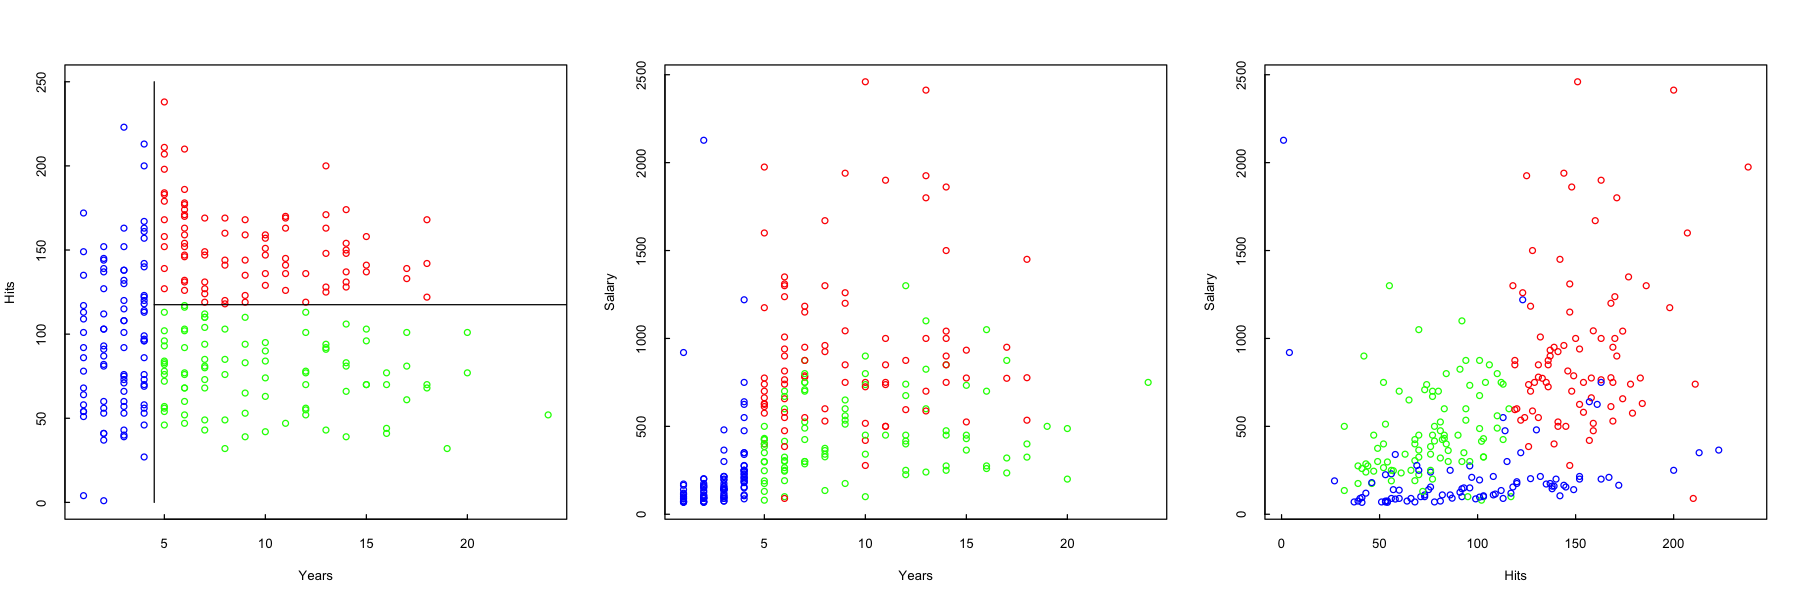

In [101]:
options(repr.plot.width=15,repr.plot.height=5)
par(mfrow=c(1,3))

color = rep(0,length(x1))
for (i in 1:length(x1)){
    singleX1 = x1[i]
    singleX2 = x2[i]
    
    if (singleX1 < 4.5){
       color[i] = "blue" 
    }
    else if (singleX1 >= 4.5 & singleX2 < 117.5){
       color[i] = "green" 
    }
    else if (singleX1 >= 4.5 & singleX2 >= 117.5){
       color[i] = "red" 
    }
}

plot(x1,x2,col=color, ylim=c(0,250),ylab='Hits',xlab='Years',tck=0.01)
lines(rep(4.5,2),c(0,250))
lines(c(4.5,25), rep(117.5,2) )

plot(x1,y,col=color ,ylab='Salary',xlab='Years',tck=0.01)
plot(x2,y,col=color ,ylab='Salary',xlab='Hits',tck=0.01)

The feature space (left) is partitioned into three regions.
These regions correspond to predictions of salary.

This tree is relatively simple. 
More complicated trees can be built from these same two $X$ variables

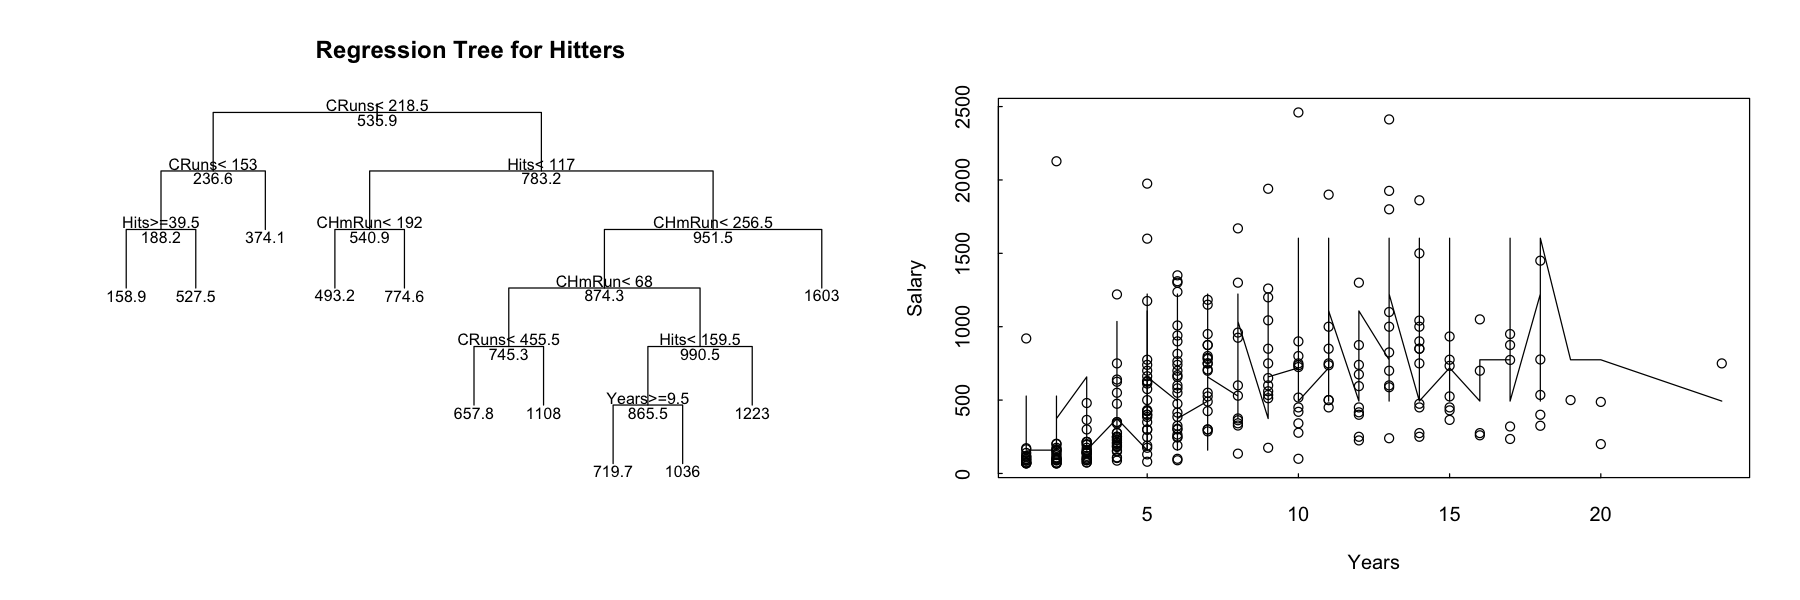

In [102]:
library(rpart)
fit <- rpart(Salary~Hits+Years+CHmRun+CRuns+Errors, method="anova", data=Hitters)

par(mfrow=c(1,2))
plot(fit, uniform=TRUE,
   main="Regression Tree for Hitters ")
text(fit, use.n=FALSE, all=TRUE, cex=0.8)

X = Hitters[,c("Hits","Years","CHmRun","CRuns","Errors")]
X = X[order(Hitters$Years),]
predictions = predict(fit,X)

plot(x1,y,xlab='Years',ylab="Salary",tck=0.01)
lines(X$Years,predictions)


On the left, a tree is made by splitting the feature space over and over into finer and finer sets of observations.
Within each region the $y$ values are averaged and considered the predictions for all observations in that region.

On the right, the predictions are plotted over the data "Years" by "Salary".
The constant, and jagged looking, appearance of the predictions is because of this "constant within region" approach to prediction.


## Prediction by splitting the feature space

To make it clear, Trees split our feature space ($X$ data) into $J$ different regions.
Given $x_{new}$, a prediction is made by finding the region $x_{new}$ belongs to and averaging all the training example $y$ values that fall into that same region. 
The same prediction is made for **all** observations that fall into that region.

## How to find the splits

To find a tree that makes the "best" predictions, we need to define what best means.
For this class, by best we mean the tree that minimizes

$$
    \text{SSE}(\hat{y}_{R_{j}}) = \sum_{j=1}^{J} \sum_{x_{i} \in R_{j}} \left( y_{i} - \hat{y}_{R_{j}}\right)^{2}
$$

or the sum square errors.
The Sum square errors is a function of $j$ different variables, one prediction for each region $(R_{j})$.
An exhaustive approach to finding the best set of $\hat{y}_{R_{j}}$ that minimize the SSE would consider every possible tree. But this means we would need to compute the SSE for every possible combination of every possible cut point for all variable in our feature space. This type of computation isn't feasible in a reasonable amount of time.

Instead, we will take a top-down approach called recursive binary splitting.
Recursive binary splitting examines, for all variables $X_{k}$ and corresponding cut points, the single $X$ variable and cut point that minimizes the SSE.
The above equation reduces to

$$
    \text{SSE}_{\text{RBS}}(\hat{y}_{R_{1}},\hat{y}_{R_{2}} ) = \sum_{x_{i} \in R_{1} } \left( y_{i} - \hat{y}_{R_{1}}\right)^{2} + \sum_{x_{i} \in R_{2}}\left( y_{i} - \hat{y}_{R_{2}}\right)^{2}
$$
where $\hat{y}_{R_{1}}$ and $\hat{y}_{R_{2}}$ correspond to the two regions generated by picking a single covariate $X_{j}$ and a single cut point $X_{j} <s$ that minimize the SSE.
This $\text{SSE}_{\text{RBS}}$ set $j$ equal to $2$ in the more general SSE equation above. 

The process is repeated, except now we find the best covariate and cutpoint that minimizes $\text{SSE}_{\text{RBS}}$ inside $R_{1}$ and inside $R_{2}$.

Below is an example of recursive binary splitting (RBS).
The two covariates considered are Hits and Years and used to predict Salary.
When the RBS algorithm is left unchecked it tends to create large, and so complex, trees.
Trees like this may overfit our training data.
We want a balance between a tree that is complex enough to understand our data, but simple enough to generlize to yet unseen observations.

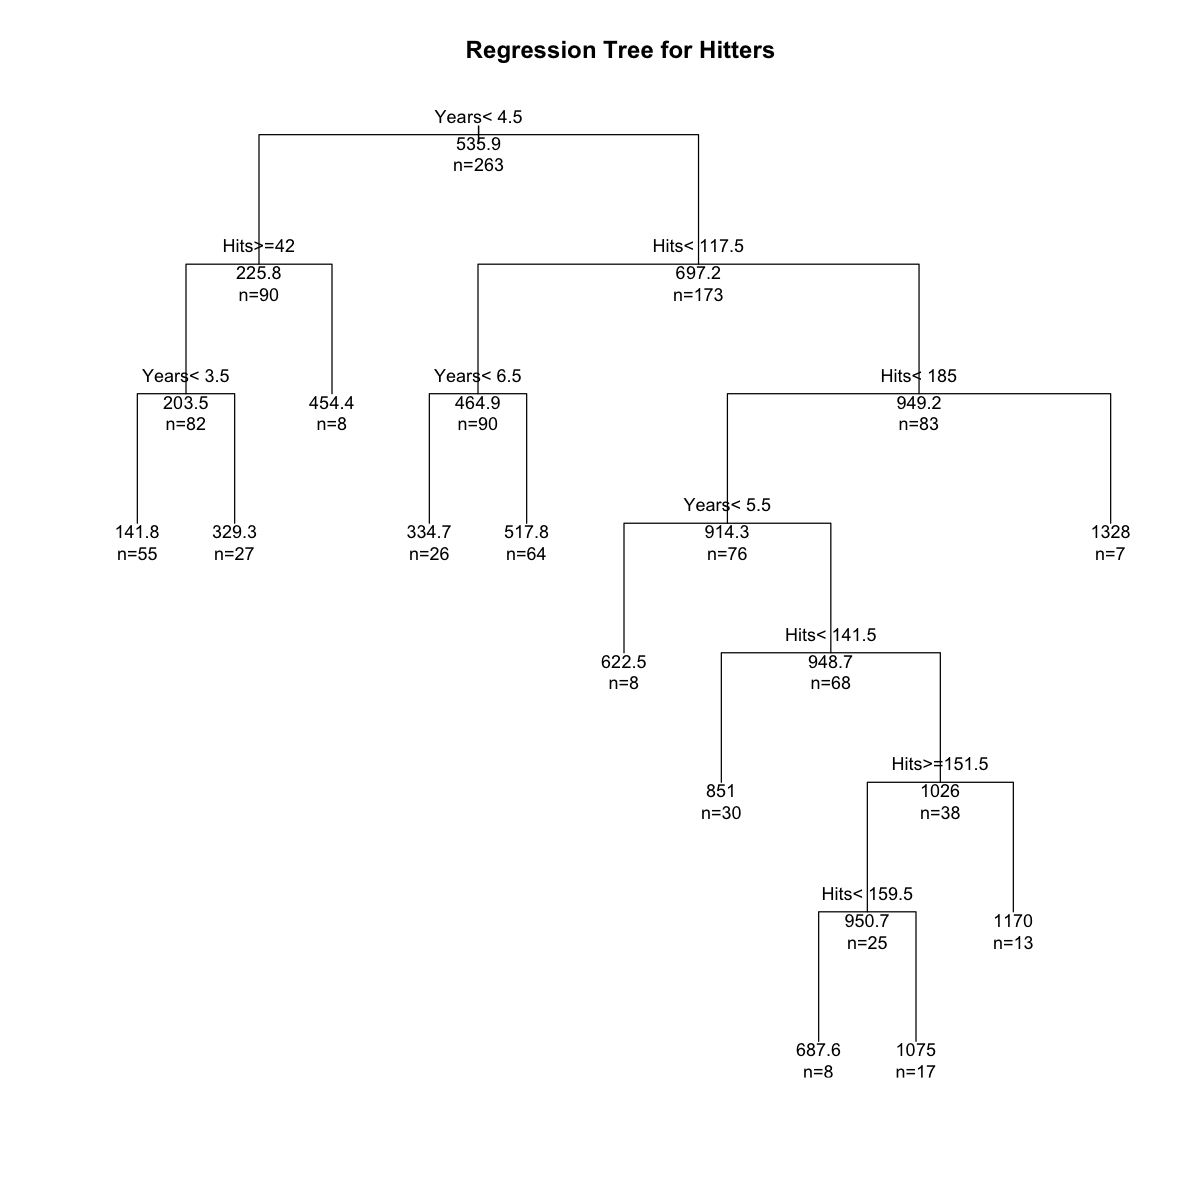

In [103]:
options(repr.plot.width=10,repr.plot.height=10)
library(rpart)
fit <- rpart(Salary~Hits+Years, method="anova", data=Hitters)

plot(fit, uniform=TRUE,
   main="Regression Tree for Hitters ")
text(fit, use.n=TRUE, all=TRUE, cex=0.9)

## Complexity Pruning

Complexity pruning works by building a very complex, and so overfit, tree first.
Then a smaller subtree is found that minimizes the following critera 

$$
    \text{SSE}_{\text{CP}} = \sum_{j=1}^{|T|} \sum_{x_{i} \in R_{j}} (y_{i} - \hat{y}_{R_{m}})^{2} + \alpha|T|
$$

where $|T|$ counts the number of regions defined for the tree and $\alpha$ is a parameter we select.
$\text{SSE}_{\text{CP}}$ is similar to the LASSO. 
A parameter that controls the complexity of the model is added in to the function to minimize.
When $\alpha$ equals zero,  $\text{SSE}_{\text{CP}}$ is the same as SSE.
A large, overfit, and complex tree will be built.
As $\alpha$ increases towards infinity, smaller and smaller trees will be built.
The cost of having additional (and smaller) regions to make predictions cannot overcome the reduction in minimizing the difference between $y$ and it's prediction $\hat{y}$. 

We can implement cross-validation to find an optimal $\alpha$.
Our data is split into test and training sets.
An $\alpha_{\text{CV}}$ is chosen by splitting our training into $K$ folds, computing the $\text{CV}_{error}$, and finding the $\alpha$ that minimizes $\text{CV}_{error}$.
This value of $\alpha$ balances between tree-complexity and prediction error.
The final model will use this $\alpha_{\text{CV}}$ in training.

In [139]:
Hitters = Hitters[complete.cases(Hitters),]
Hitters[,"logSalary"] = log(Hitters$Salary)

N = length(Hitters)
K = 10
ALPHAs= seq(0.25,0.01,-0.01)
# split into K folds
Kfolds = split(Hitters,1:K)

AllCVs = rep(0,length(ALPHAs))

i=1
for (ALPHA in ALPHAs){
    MSEs = rep(0,K)
    for(k in 1:K){
        trainingIndices = setdiff(1:K,k)    
        trainingData = do.call(rbind,Kfolds[trainingIndices])
        testingData  = Kfolds[[k]] 

        BigTree <- rpart(logSalary~Hits+Years+RBI+Walks+PutOuts, method="anova", data=trainingData)
        smallerTree = prune(BigTree, cp = ALPHA)

        predictions = predict(smallerTree, testingData)
        MSEs[k] = t(testingData$logSalary - predictions)%*%(testingData$logSalary - predictions)
    }
    AllCVs[i] = mean(MSEs)
    i=i+1
}

Warning message in split.default(x = seq_len(nrow(x)), f = f, drop = drop, ...):
“data length is not a multiple of split variable”


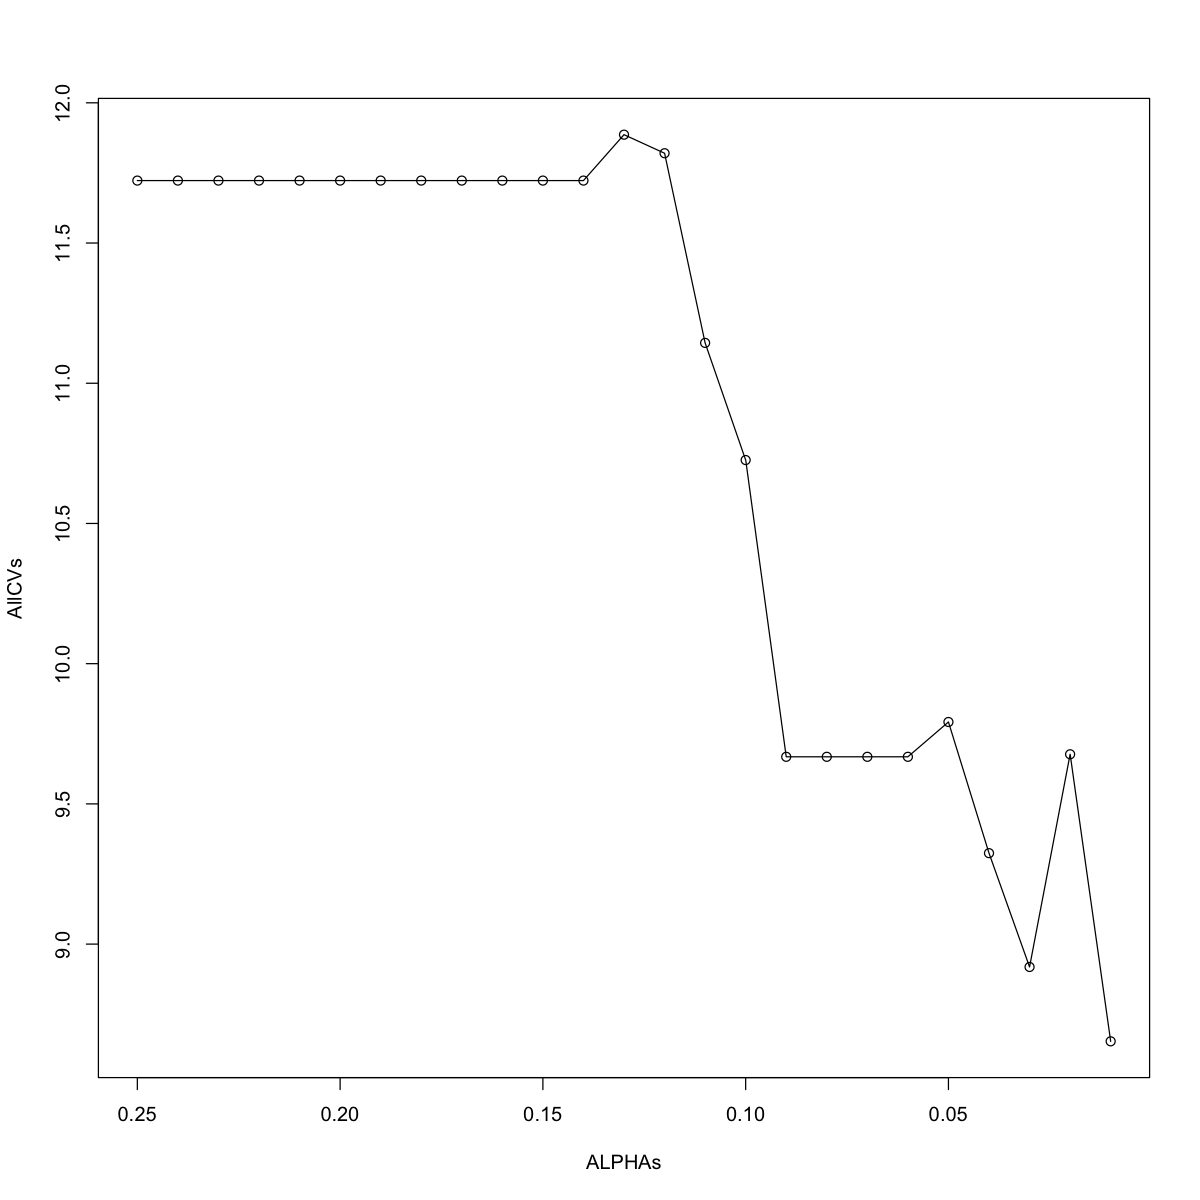

In [138]:
plot(ALPHAs,AllCVs, xlim=c(0.25,0.01) )
lines(ALPHAs,AllCVs)

## Trees for Classification

The same methods above to predict a continuous target variable can be used to predict a binary variable for classifying new data.
The average of a set of binary (0-1) $y$s is equal to the probability this new $x$ observation is equal to $1$. 
Trees that predict the probability of membership in one of several classes are called **Classification Trees**.

However different metrics other than sum squares error may make more sense for assessing fit.
A natural alternative is the classification error rate (CER).
CER for region $M$ is defined as 

$$
    \text{CER}(M) = p_{m} - \max_{k} \left( p_{mk} \right)
$$
where $p_{m}$ is the proportion of observations in region $M$, and $\max_{k} \left( p_{mk} \right)$ is the largest proportion of observations in region $m$ assigned to group $k$.
We would predict this more frequent group to any new observations that fall into region $M$.

The CER over summed over all regions equals 

\begin{align}
    \text{CER} &= \sum_{m} \text{CER}(m) = \sum_{m} \left[ p_{m} - \max_{k} \left( p_{mk} \right) \right]\\
    &= \sum_{m} p(m) - \sum_{m} \max_{k} \left( p_{mk} \right)\\
    &= 1 - \sum_{m} \max_{k} \left( p_{mk} \right)
\end{align}



where $p_{mk}$ is the proportion of observations over all observations in the dataset that fall in the $m^{\text{th}}$ region and belong to group $k$.
In practice this metric is very rarely used.

## GINI and Cross-Entropy

Given a set of $N$ observations , and $K$ classes the data can fall into, let $p_{k}$ be the proportion of observations classified into class $k$.
Then the GINI index is defined as 

$$
\text{GINI} = \sum_{k=1}^{K} p_{k}(1-p_{k})
$$

and the cross-entropy is defined as 

$$
\text{CE} = -\sum_{k=1}^{K} p_{k}\log(p_{k})
$$


In [145]:
heart = read.csv("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/SAheart.data")
print(head(heart))

  row.names sbp tobacco  ldl adiposity famhist typea obesity alcohol age chd
1         1 160   12.00 5.73     23.11 Present    49   25.30   97.20  52   1
2         2 144    0.01 4.41     28.61  Absent    55   28.87    2.06  63   1
3         3 118    0.08 3.48     32.28 Present    52   29.14    3.81  46   0
4         4 170    7.50 6.41     38.03 Present    51   31.99   24.26  58   1
5         5 134   13.60 3.50     27.78 Present    60   25.99   57.34  49   1
6         6 132    6.20 6.47     36.21 Present    62   30.77   14.14  45   0


In [155]:
classTree = rpart(chd~., data=heart)
predictedProbs = predict(classTree,heart)
classes        = ifelse(predictedProbs>0.50,1,0)

GINI = mean(classes)*(1-mean(classes))
GINI

CE = 0
for(k in seq(0,1,1)){
    CE = CE-mean(classes==k)*log(mean(classes==k)) 
}
CE

[1] 0.2347782

[1] 0.6623869